# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import normalize

# Dataset Loading and preparation

In [2]:
data=pd.read_csv("./wine_dataset.csv")

In [3]:
data.shape

(6497, 13)

In [4]:
data.head()

Unnamed: 0  fixed acidity  volatile acidity  citric acid  residual sugar  \
0           0            7.4              0.70         0.00             1.9   
1           1            7.8              0.88         0.00             2.6   
2           2            7.8              0.76         0.04             2.3   
3           3           11.2              0.28         0.56             1.9   
4           4            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4      5.0  
1       0.68      9.8      5.0  
2       0.65      9.8      5.0  
3       0.58      9.8      6.0  
4       0.56      9.4      5.0

In [5]:
data=data.drop('Unnamed: 0',axis=1)
data.dropna()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4      5.0  
1         9.8      5.0  
2         9.8      5.0  
3         9.8      6.0  
4         9.4      5.0  
...       ...      ...  
6492     11.2      6.0  
6493      9.6      5.0  
6494      9.4      6.0  
6495     12.8      7.0  
6496     11.8      6.0  

[6497 rows x 12 columns]

In [6]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8      5.0  
3      9.8      6.0  
4      9.4      5.0

In [7]:
data.shape

(6497, 12)

In [8]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

# Data Visualization

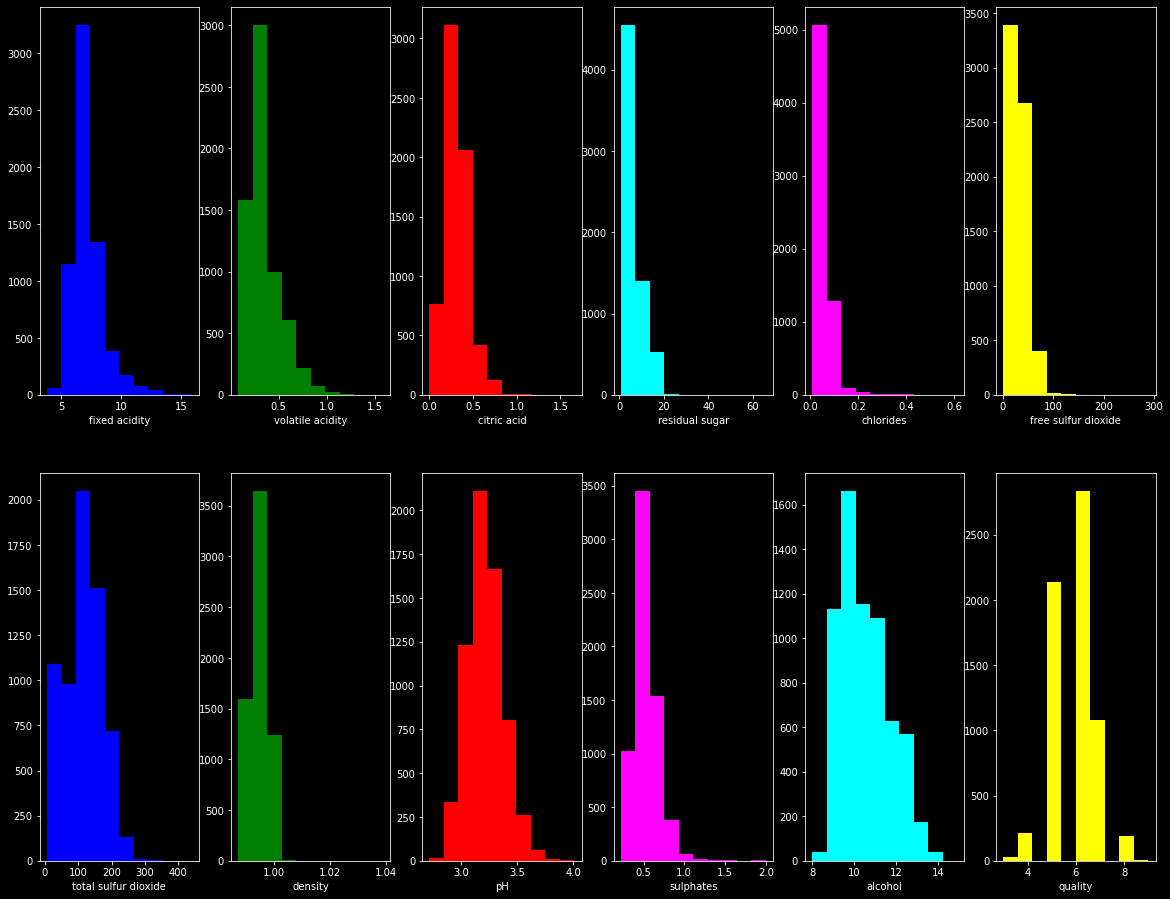

In [9]:
plt.style.use('dark_background')
colors=['blue','green','red','cyan','magenta','yellow','blue','green','red','magenta','cyan','yellow']
plt.figure(figsize=(20,50))
for i in range(1,13):
    plt.subplot(6,6,i)
    plt.hist(data[data.columns[i-1]],color=colors[i-1])
    plt.xlabel(data.columns[i-1])
plt.show()

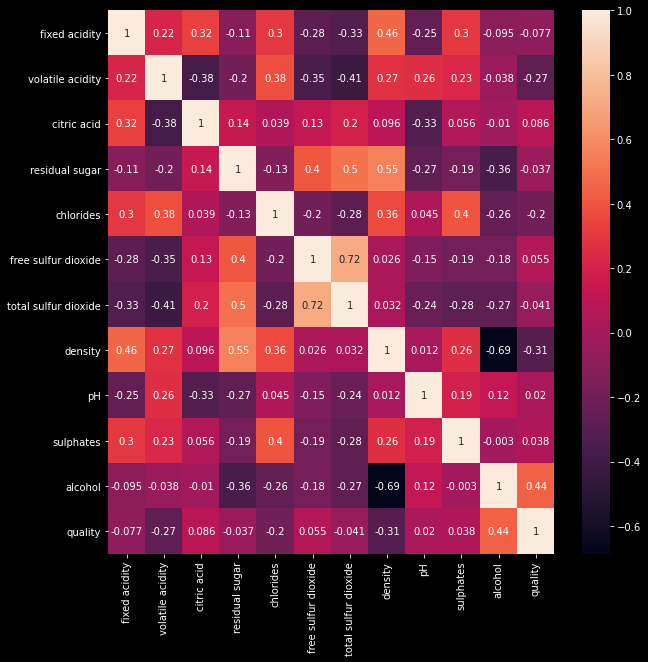

In [10]:
import seaborn as sns
plt.figure(figsize=(10,10))
correlations = data[data.columns].corr(method='pearson')
sns.heatmap(correlations, annot = True)
plt.show()

# Train-Test Split

In [11]:
data.shape

(6497, 12)

In [12]:
split=int(0.8*data.shape[0])
print("Split of data is at: ",split)
print("\n-------AFTER SPLITTING-------")
train_data=data[:split]
test_data=data[split:]
print('Shape of train data:',train_data.shape)
print('Shape of train data:',test_data.shape)
print("\n----CREATING X AND Y TRAINING TESTING DATA----")
y_train=train_data['quality']
y_test=test_data['quality']
x_train=train_data.drop('quality',axis=1)
x_test=test_data.drop('quality',axis=1)
print('Shape of x train data:',x_train.shape)
print('Shape of y train data:',y_train.shape)
print('Shape of x test data:',x_test.shape)
print('Shape of y test data:',y_test.shape)

Split of data is at:  5197

-------AFTER SPLITTING-------
Shape of train data: (5197, 12)
Shape of train data: (1300, 12)

----CREATING X AND Y TRAINING TESTING DATA----
Shape of x train data: (5197, 11)
Shape of y train data: (5197,)
Shape of x test data: (1300, 11)
Shape of y test data: (1300,)


# Normalizing Data

In [13]:
nor_train=normalize(x_train)
nor_test=normalize(x_test)

In [14]:
nor_train

array([[0.19515252, 0.01846037, 0.        , ..., 0.09256559, 0.0147683 ,
        0.24789644],
       [0.10724124, 0.01209901, 0.        , ..., 0.04399641, 0.00934924,
        0.134739  ],
       [0.13545665, 0.01319834, 0.00069465, ..., 0.05661393, 0.01128805,
        0.17018912],
       ...,
       [0.05532044, 0.00122934, 0.00222818, ..., 0.02397219, 0.00307336,
        0.09296907],
       [0.0540952 , 0.00139336, 0.00229495, ..., 0.02458873, 0.00426205,
        0.09753529],
       [0.04450144, 0.0012811 , 0.00188794, ..., 0.0214416 , 0.00249478,
        0.07282054]])

In [15]:
nor_test

array([[0.03193416, 0.00110118, 0.00132141, ..., 0.01976614, 0.0030833 ,
        0.06772244],
       [0.02847699, 0.00168273, 0.00163958, ..., 0.01423849, 0.00245938,
        0.04055813],
       [0.07132209, 0.00125863, 0.00314656, ..., 0.03356334, 0.00367099,
        0.10383657],
       ...,
       [0.05622854, 0.00207613, 0.0016436 , ..., 0.02586513, 0.00397925,
        0.08131512],
       [0.04878972, 0.00257255, 0.00266126, ..., 0.02962867, 0.00337093,
        0.11354698],
       [0.05918939, 0.00207163, 0.00374866, ..., 0.03215957, 0.00315677,
        0.11640581]])

In [16]:
clf = svm.SVC(kernel='linear')
clf.fit(nor_train, y_train)
y_pred_svm = clf.predict(nor_test)
print("Accuracy (SVM) :",metrics.accuracy_score(y_test, y_pred_svm)*100)

Accuracy (SVM) : 50.30769230769231


In [17]:
logmodel = LogisticRegression()
logmodel.fit(nor_train, y_train)
y_pred_LR= logmodel.predict(nor_test)
print('Mean Absolute Error(Logistic Regression):', metrics.mean_absolute_error(y_test, y_pred_LR)*100)

Mean Absolute Error(Logistic Regression): 52.0


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
